In [1]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

A previous chapter demonstrated that some functions can be expressed as an infinite sum of polynomials (i.e. Taylor Series).                                                                                                                
Other functions, particularly periodic functions, can be written as an infinite sum of sine and cosine waves. For these functions,$$ \displaystyle{f(x) = \frac{a_o}{2} + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx }$$
It can be shown that the values of $A_n$ and $B_n$ can be computed using the following formulas:

 $$ \displaystyle{\qquad a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos nx \text{ d}x }$$

$$ \displaystyle{\qquad b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin nx \text{ d}x }$$

Just like Taylor series, functions can be approximated by truncating the Fourier series at some $n=N$. Fourier series can be used to approximate some particularly nasty functions such as the step function, and they form the basis of many engineering applications such as signal processing.

Write a function *my_fourier_coef(f,n)*, with output *[An,Bn]*, where *f* is an function object that is $2π$-periodic.   
The function *my_fourier_coef* should compute the *n*-th Fourier coefficients, $A_n$ and $B_n$, in the Fourier series for *f* defined by the two formulas given earlier.                                                                           
You should use the *quad* function to perform the integration.

In [2]:
def my_fourier_coef(f,n):
    A,B=[],[]
    An=(1/np.pi)*si.quad(lambda x:np.cos(n*x)*f(x),-np.pi,np.pi,limit=200)[0]
    A.append(An)
    Bn=(1/np.pi)*si.quad(lambda x:np.sin(n*x)*f(x),-np.pi,np.pi,limit=200)[0]
    B.append(Bn)
    return A,B

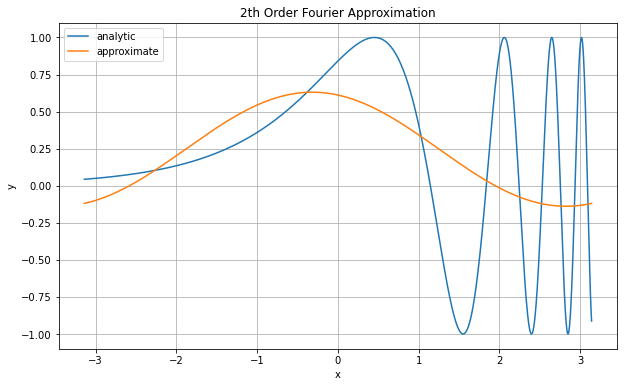

In [3]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()

f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)

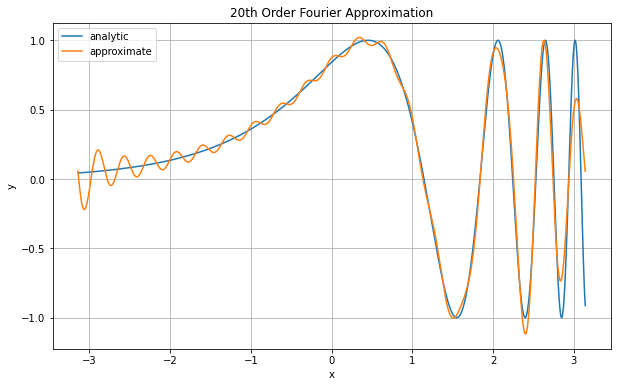

In [4]:
N = 20
plot_results(f, N)

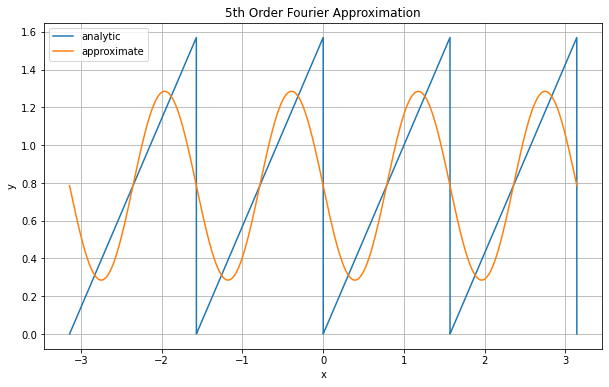

In [5]:
f = lambda x: np.mod(x, np.pi/2)
N = 5
plot_results(f, N)

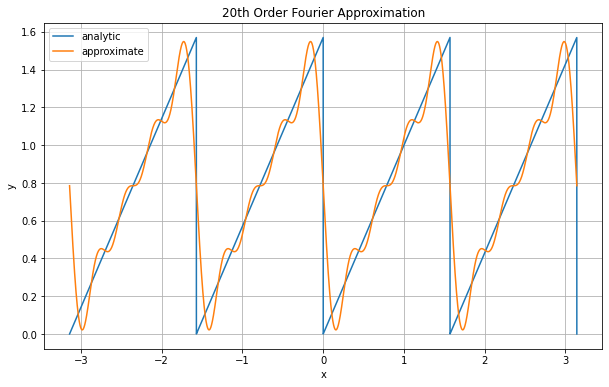

In [6]:
N = 20
plot_results(f, N)

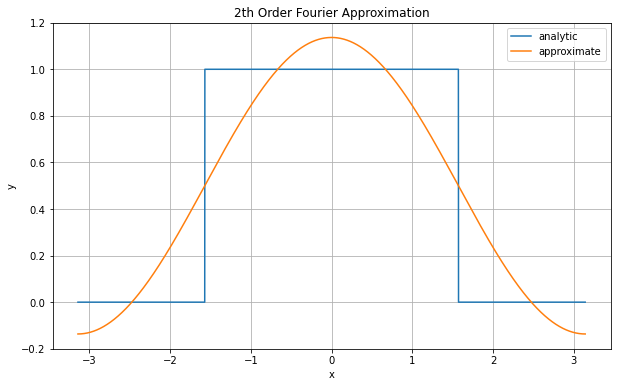

In [7]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2
plot_results(f, N)

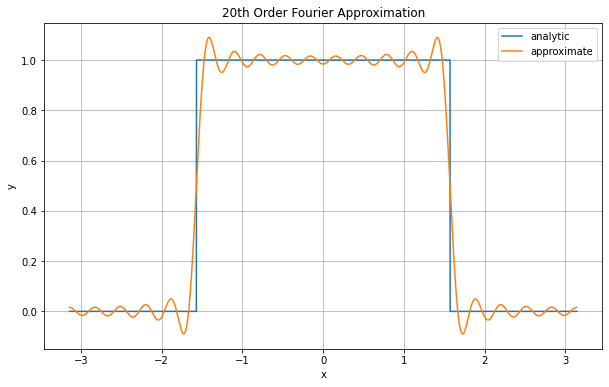

In [8]:
N = 20
plot_results(f, N)